# Лабораторная работа №2

### ФИО: Селина Елизавета Александровна
### Группа: БИВТ-23-СП-2

Мне попался дата-сет про подготовку студентов к тестам и их оценки по курсам. Данный дата-сет называется *StudentsPerformance*. Теперь давайте **просто** проведем общий EDA и ответим на вопрос, действительно ли это **просто** :)
Теперь выполним задание по пунктам.

### Задание 1. 
Название датасета: **Students Performance in Exams** 

### Задание 2.
Кратко опишем постановку задачи и датасет.

In [1]:
# Импорт стандартных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Чтобы графики выглядели аккуратно
plt.style.use('ggplot') #один из предустановленных стилей
plt.rcParams['figure.figsize'] = (8, 5)

#Загрузка данных
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


В датасете собрана информация о школьниках и их результатах по трём экзаменам:
- math score
- reading score
- writing score

Также есть несколько категориальных признаков:
- gender  
- race/ethnicity  
- parental level of education  
- lunch  
- test preparation course  

Так как оценки — это числа в диапазоне [0; 100], они являются **непрерывными** величинами.  

### Задание 3. Распределение целевой переменной
Допустим целевой переменной мы выбираем math score — самое очевидное.

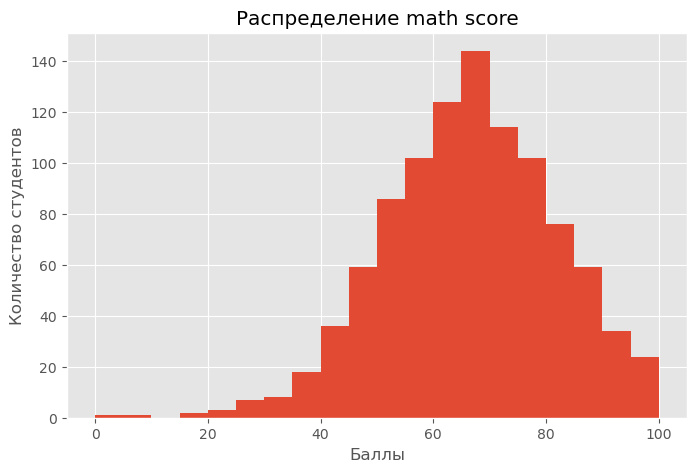

81

In [7]:
# Гистограмма целевой переменной
plt.hist(df["math score"], bins=20)
plt.title("Распределение math score")
plt.xlabel("Баллы")
plt.ylabel("Количество студентов")
plt.show()

# Количество уникальных значений
df["math score"].nunique()


Мы видим, что распределние напоминает колокол нормального распределения, но в то же время видим и уклон.

### Задание 4. Распределение целевой переменной
Основные статистики по переменным в датасете. Хотя я это делала прежде, давайте сделаем еще раз.

In [9]:
df.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


В выборке 1000 студентов с небольшим перевесом женщин (518). Большинство относятся к группе C, имеют родителей с неоконченным высшим образованием, стандартный ланч и не проходили подготовительные курсы. Средние баллы: чтение (69.2) > письмо (68.1) > математика (66.1). Математика имеет наибольший разброс результатов (стандартное отклонение ~15.2), ну а кто сомневался, а также в ней есть экстремально низкий результат (0 баллов). В целом, результаты по чтению у студентов лучше всего.

### Задание 5. Основная информация о датасете

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Датасет содержит 1000 строк и 8 колонок

Все колонки полностью заполнены (1000 non-null значений в каждой)

5 категориальных колонок (object) и 3 числовых (int64)

Объем памяти: 62.6+ KB

### Задание 6. Количество пропусков.

In [12]:
# Количество пропусков в каждой колонке
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

В этом датасете нет пропусков (StudentsPerformance — чистый датасет).Но гипотетически пропуски могли появиться из-за: неответов учеников, ошибок сбора данных, отсутствующей информации в исходных анкетах.

### Задание 7. Гистограммы признаков.

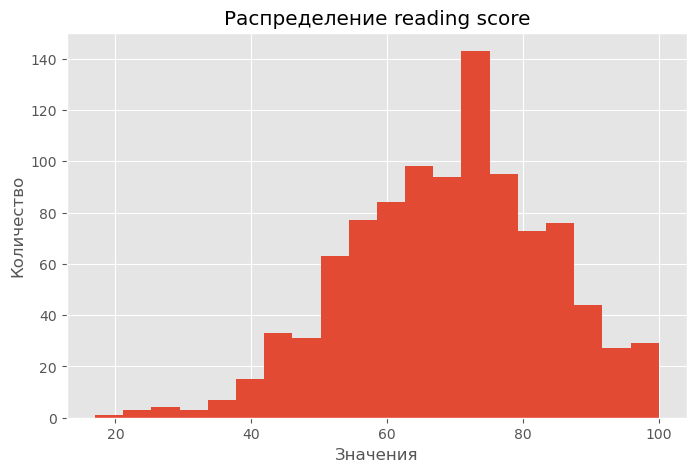

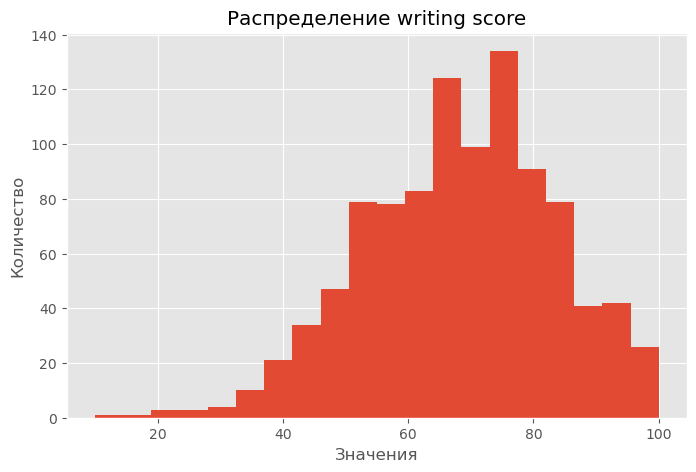

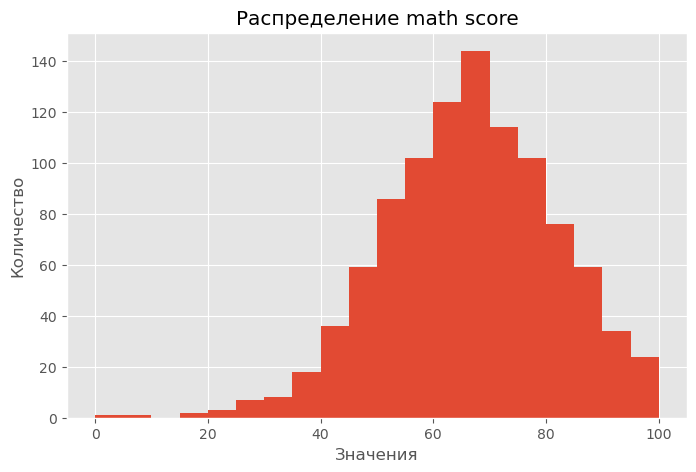

In [14]:
features = ["reading score", "writing score", "math score", "race/ethnicity", "gender"]

for f in ["reading score", "writing score", "math score"]:
    plt.hist(df[f], bins=20)
    plt.title(f"Распределение {f}")
    plt.xlabel("Значения")
    plt.ylabel("Количество")
    plt.show()


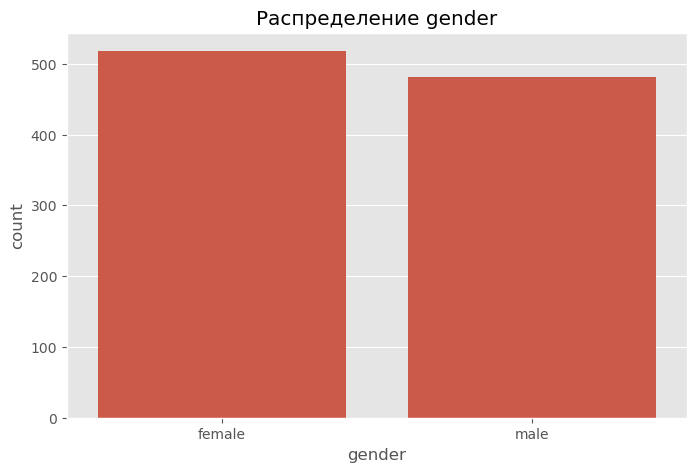

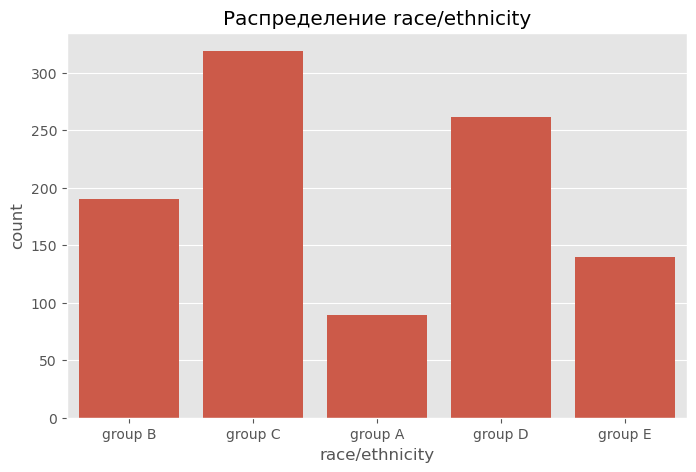

In [19]:
#И для категориальных:
sns.countplot(data=df, x="gender")
plt.title("Распределение gender")
plt.show()

sns.countplot(data=df, x="race/ethnicity")
plt.title("Распределение race/ethnicity")
plt.show()


оценки примерно нормальные

race/ethnicity распределено неравномерно

gender почти равномерно

### Задание 8. Графики зависимости 5 переменных от целевой переменной.
Будем смотреть math score vs другие признаки.

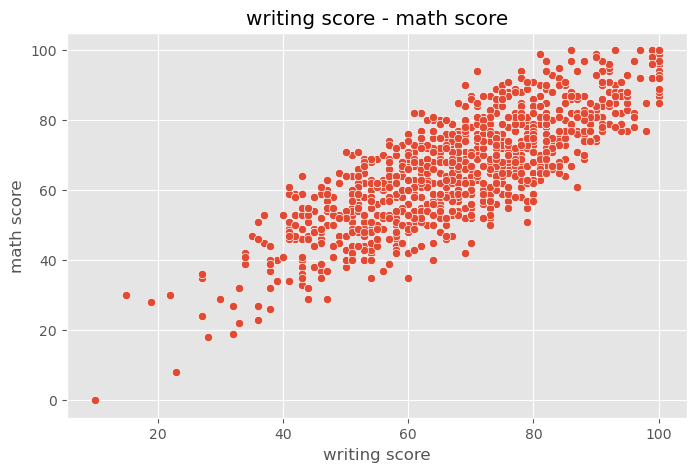

In [32]:
sns.scatterplot(data=df, x="writing score", y="math score")
plt.title("writing score - math score")
plt.show()

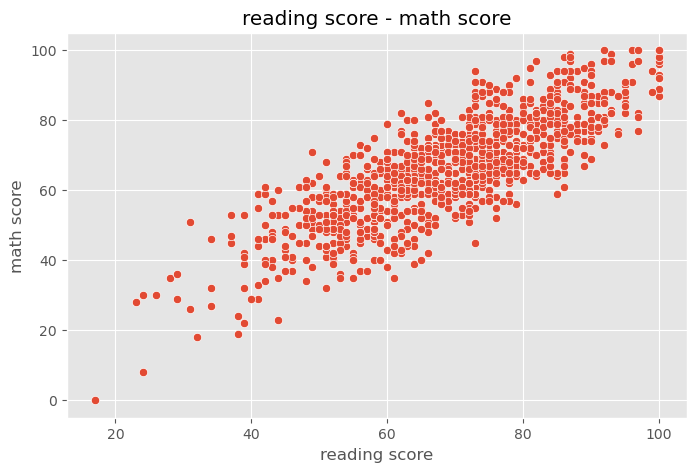

In [30]:
sns.scatterplot(data=df, x="reading score", y="math score")
plt.title("reading score - math score")
plt.show()

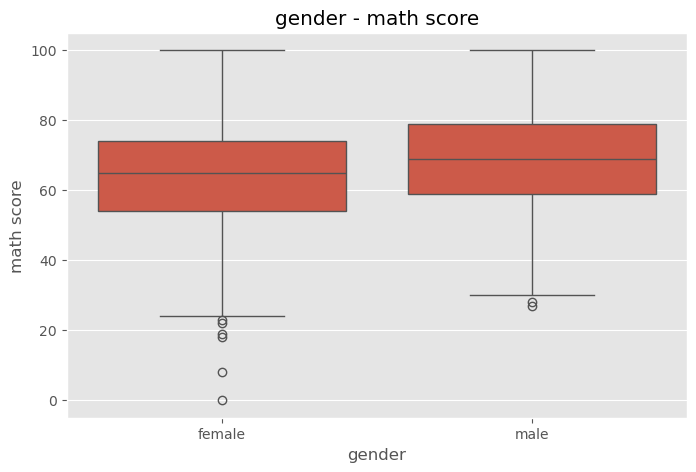

In [34]:
sns.boxplot(data=df, x="gender", y="math score")
plt.title("gender - math score")
plt.show()

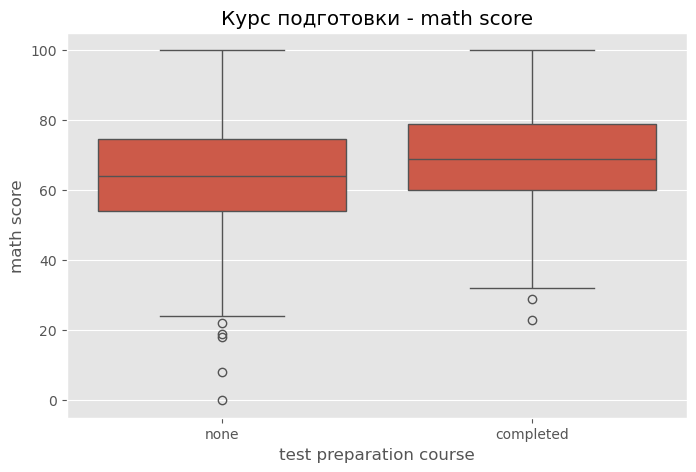

In [35]:
sns.boxplot(data=df, x="test preparation course", y="math score")
plt.title("Курс подготовки - math score")
plt.show()

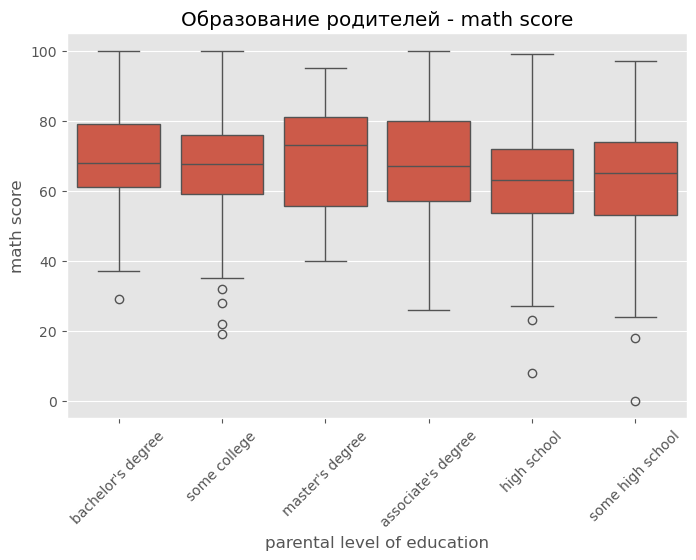

In [36]:
sns.boxplot(data=df, x="parental level of education", y="math score")
plt.title("Образование родителей - math score")
plt.xticks(rotation=45)
plt.show()

Числовые переменные reading score и writing score демонстрируют четкую положительную линейную зависимость с математическими результатами: студенты с высокими баллами по чтению и письму обычно показывают высокие результаты и по математике, что делает эти переменные сильными предикторами. Среди категориальных переменных наблюдается устойчивая стратификация: мужчины в среднем показывают более высокие результаты по математике по сравнению с женщинами; студенты, завершившие подготовительные курсы, существенно превосходят по результатам тех, кто не проходил подготовку; также прослеживается зависимость от образования родителей - дети родителей с высшим образованием (бакалавриат, магистратура) демонстрируют лучшие математические достижения. 

### Задание 9. Зависимость двух переменных одновременно от целевой переменной.

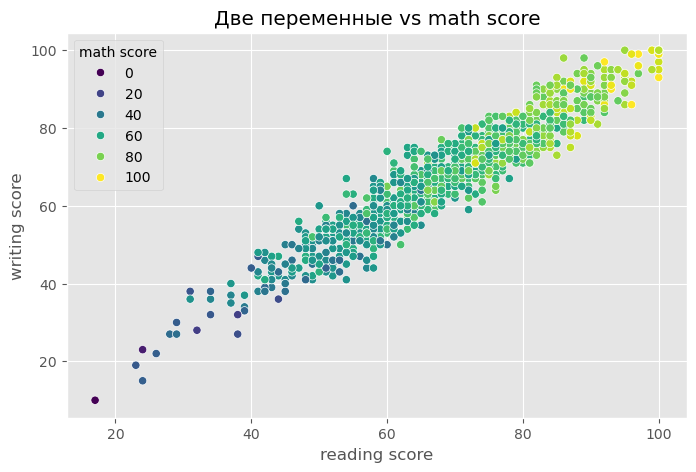

In [38]:
sns.scatterplot(
    data=df,
    x="reading score",
    y="writing score",
    hue="math score",
    palette="viridis"
)
plt.title("Две переменные vs math score")
plt.show()


Ось X: баллы за чтение (reading score)

Ось Y: баллы за письмо (writing score)

Цвет точек: баллы за математику (math score) - чем темнее/желтее точка, тем выше результат по математике

Существует сильная положительная корреляция между всеми тремя предметами. Студенты, хорошо успевающие по гуманитарным предметам (чтение и письмо), с большой вероятностью будут хорошо успевать и по математике.